In [1]:
from array import array
import matplotlib.pyplot as plt

In [2]:
def fderiv(y,t,deriv):
    deriv[0] = 2.0*t*y[0]*y[0]
    #deriv[0] = a*math.pow(math.sin(t),2)*y[0]

In [3]:
def yexact(t):
    return 1.0/(1.0-t*t)
    #return 2*param[0]*math.exp(0.5*(t - math.sin(t)*math.cos(t)))

In [4]:
def euler(y,nY,t,tau,deriv):
    F1 = array('d')
    
    for i in range(0,nY):
        F1.append(0.0)
    
    fderiv(y,t,F1)
    
    for i in range(0,nY):
        y[i] = y[i] + tau*F1[i]

In [5]:
def rk2(y,nY,t,tau,deriv):
    F1 = array('d')
    F2 = array('d')
    ytemp = array('d')
    
    for i in range(0,nY):
        F1.append(0.0)
        F2.append(0.0)
        ytemp.append(0.0)
    
    fderiv(y,t,F1)
    
    half_tau = 0.5*tau
    t_half = t + half_tau
    
    for i in range(0,nY):
        ytemp[i]=y[i]+half_tau*F1[i]
        
    fderiv(ytemp,t_half,F2)
        
    for i in range(0,nY):
        y[i] = y[i] + tau*F2[i]

In [6]:
def rk4(y,nY,t,tau,deriv):
    F1 = array('d')
    F2 = array('d')
    F3 = array('d')
    F4 = array('d')
    ytemp = array('d')
    
    for i in range(0,nY):
        F1.append(0.0)
        F2.append(0.0)
        F3.append(0.0)
        F4.append(0.0)
        ytemp.append(0.0)
        
    fderiv(y,t,F1)
    
    half_tau = 0.5*tau
    t_half = t + half_tau
    
    for i in range(0,nY):
        ytemp[i] = y[i] + half_tau*F1[i]
        
    fderiv(ytemp,t_half,F2)
    
    for i in range(0,nY):
        ytemp[i] = y[i] + half_tau*F2[i]
        
    fderiv(ytemp,t_half,F3)
    
    t_full = t + tau

    for i in range(0,nY):
        ytemp[i] = y[i] + tau*F3[i]
        
    fderiv(ytemp,t_full,F4)
    
    for i in range(0,nY):
        y[i] = y[i] + tau/6.0*(F1[i]+F4[i]+2.0*(F2[i]+F3[i]))

In [27]:
# Wikipedia page y' = (sin(t))^2*y

nStep = 100000
a = 0.9999
tau = a/nStep

# Everything below this point is calculated.
y0 = 1.0
yp0 = 0.0

tlow = 0

yy = array('d')
yy2 = array('d')
tt = array('d')
tt2 = array('d')

for i in range(0,nStep+1):
    texact = tlow + i*tau
    yy.append(yexact(texact))
    tt.append(texact)
for i in range(0,2*nStep+1):
    texact = tlow + i*tau/2.0
    yy2.append(yexact(texact))
    tt2.append(texact)
    
#print(yy,tt)
#print(yy2,tt2)

In [28]:
y1 = array('d')
y2 = array('d')
y3 = array('d')
y4 = array('d')

state1 = array('d')
state2 = array('d')
state3 = array('d')
state4 = array('d')

deriv1 = array('d')
deriv2 = array('d')
deriv3 = array('d')
deriv4 = array('d')

nState = 1

y1.append(y0)
y2.append(y0)
y3.append(y0)
y4.append(y0)

state1.append(y1[0])
state2.append(y2[0])
state3.append(y3[0])
state4.append(y4[0])

for i in range(0,nState):
    deriv1.append(yp0)
    deriv2.append(yp0)
    deriv3.append(yp0)
    deriv4.append(yp0)
    
yplot1 = array('d')
yplot2 = array('d')
yplot3 = array('d')
yplot4 = array('d')

tplot1 = array('d')
tplot2 = array('d')
tplot3 = array('d')
tplot4 = array('d')

for method in range(1,5):
    time = 0.0
    for iStep in range(0,nStep+1):
        
        if (method == 1):
            yplot1.append(y1[0])
            tplot1.append(time)
            euler(state1,nState,time,tau,deriv1)
            y1[0] = state1[0]
            time = time + tau
        else:
            if (method == 2):
                yplot2.append(y2[0])
                tplot2.append(time)
                euler(state2,nState,time,tau/2.0,deriv2)
                y2[0] = state2[0]
                time = time + tau/2.0
                yplot2.append(y2[0])
                tplot2.append(time)
                euler(state2,nState,time,tau/2.0,deriv2)
                y2[0] = state2[0]
                time = time + tau/2.0
            else:
                if (method == 3):
                    yplot3.append(y3[0])
                    tplot3.append(time)
                    rk2(state3,nState,time,tau,deriv3)
                    y3[0]=state3[0]
                    time = time + tau
                else:
                    yplot4.append(y4[0])
                    tplot4.append(time)
                    rk4(state4,nState,time,tau,deriv4)
                    y4[0]=state4[0]
                    time = time + tau


                

print (tplot1[nStep],tplot2[2*nStep],tplot3[nStep],tplot4[nStep])
print (tplot1[0],tplot2[0],tplot3[0],tplot4[0])
print (len(tplot1),len(tplot2),len(tplot3),len(tplot4))

print (yplot1[nStep],yplot2[2*nStep],yplot3[nStep],yplot4[nStep])
print (yplot1[0],yplot2[0],yplot3[0],yplot4[0])
print (len(yplot1),len(yplot2),len(yplot3),len(yplot4))

0.9998999999988085 0.9998999999985428 0.9998999999988085 0.9998999999988085
0.0 0.0 0.0 0.0
100001 200002 100001 100001
2809.1401789314577 3565.517717015106 4966.148030782228 5000.243152977659
1.0 1.0 1.0 1.0
100001 200002 100001 100001


5000.243152977659 4966.148030782228 3565.517717015106 2809.1401789314577 5000.250012502432 5000.250012502432
0.9998999999988085 0.9998999999988085 0.9998999999985428 0.9998999999988085 0.9999 0.9999


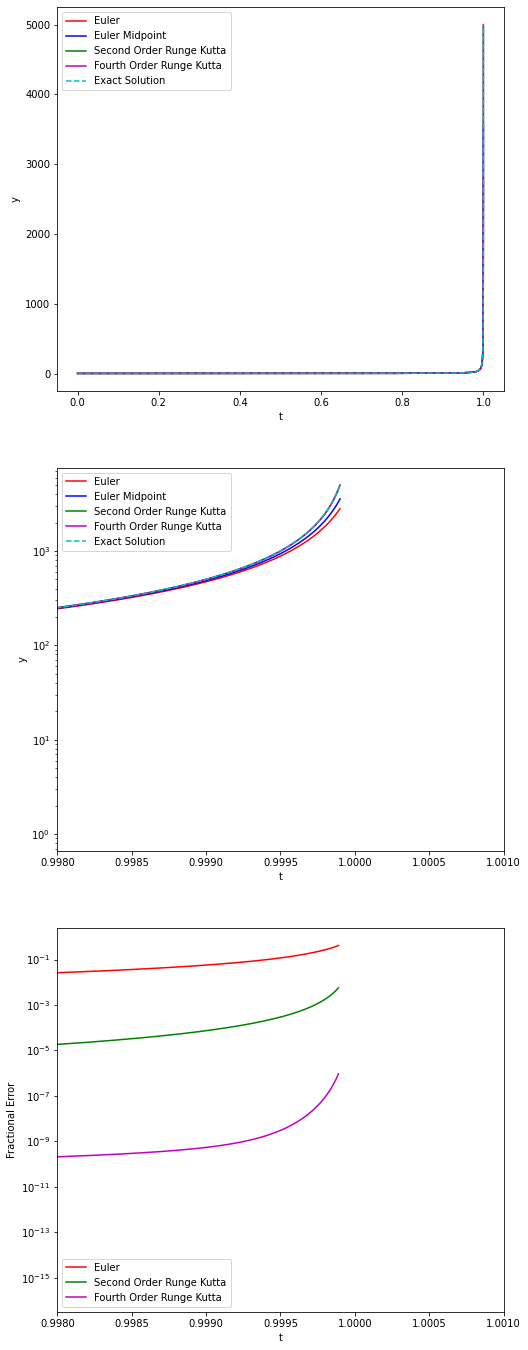

In [30]:
fig, axs = plt.subplots(3, 1,figsize=(8,24))

axs[0].plot(tplot1[0:nStep+1],yplot1[0:nStep+1],'r-',label='Euler')
axs[0].plot(tplot2[0:2*nStep+1],yplot2[0:2*nStep+1],'b-',label='Euler Midpoint')
axs[0].plot(tplot3[0:nStep+1],yplot3[0:nStep+1],'g-',label='Second Order Runge Kutta')
axs[0].plot(tplot4[0:nStep+1],yplot4[0:nStep+1],'m-',label='Fourth Order Runge Kutta')
axs[0].plot(tt,yy,'c--',label='Exact Solution')
axs[0].set_ylabel('y')
axs[0].set_xlabel('t')
axs[0].legend()

axs[1].plot(tplot1[0:nStep+1],yplot1[0:nStep+1],'r-',label='Euler')
axs[1].plot(tplot2[0:2*nStep+1],yplot2[0:2*nStep+1],'b-',label='Euler Midpoint')
axs[1].plot(tplot3[0:nStep+1],yplot3[0:nStep+1],'g-',label='Second Order Runge Kutta')
axs[1].plot(tplot4[0:nStep+1],yplot4[0:nStep+1],'m-',label='Fourth Order Runge Kutta')
axs[1].plot(tt,yy,'c--',label='Exact Solution')
axs[1].set_yscale('log')
axs[1].set_ylabel('y')
axs[1].set_xlabel('t')
axs[1].set_xlim(0.998,1.001)
#axs[1].set_ylim(40,4000)
axs[1].legend()

import numpy as np
yplot1 = np.array(yplot1)
yplot2 = np.array(yplot2)
yplot3 = np.array(yplot3)
yplot4 = np.array(yplot4)
yy = np.array(yy)
tplot1 = np.array(tplot1)
tplot2 = np.array(tplot2)
tplot3 = np.array(tplot3)
tplot4 = np.array(tplot4)

yerr1 = np.abs(yplot1-yy)/yy
#yerr2 = np.abs(yplot2-yy2)/yy2
yerr3 = np.abs(yplot3-yy)/yy
yerr4 = np.abs(yplot4-yy)/yy

print (yplot4[nStep],yplot3[nStep],yplot2[2*nStep],yplot1[nStep],yy[nStep],yy2[2*nStep])
print (tplot4[nStep],tplot3[nStep],tplot2[2*nStep],tplot1[nStep],tt[nStep],tt2[2*nStep])

axs[2].plot(tplot1[0:nStep],yerr1[0:nStep],'r-',label='Euler')
#axs[2].plot(tplot2[0:2*nStep-1],yerr2[0:2*nStep-1],'b-',label='Euler Midpoint')
axs[2].plot(tplot3[0:nStep],yerr3[0:nStep],'g-',label='Second Order Runge Kutta')
axs[2].plot(tplot4[0:nStep],yerr4[0:nStep],'m-',label='Fourth Order Runge Kutta')
axs[2].set_yscale('log')
axs[2].set_ylabel('Fractional Error')
axs[2].set_xlabel('t')
axs[2].set_xlim(0.998,1.001)
#axs[2].set_ylim(0.001,1)
axs[2].legend()